<a href="https://colab.research.google.com/github/yee23456/AI_problem_analysis/blob/main/%E4%BD%9C%E6%A5%AD%E4%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

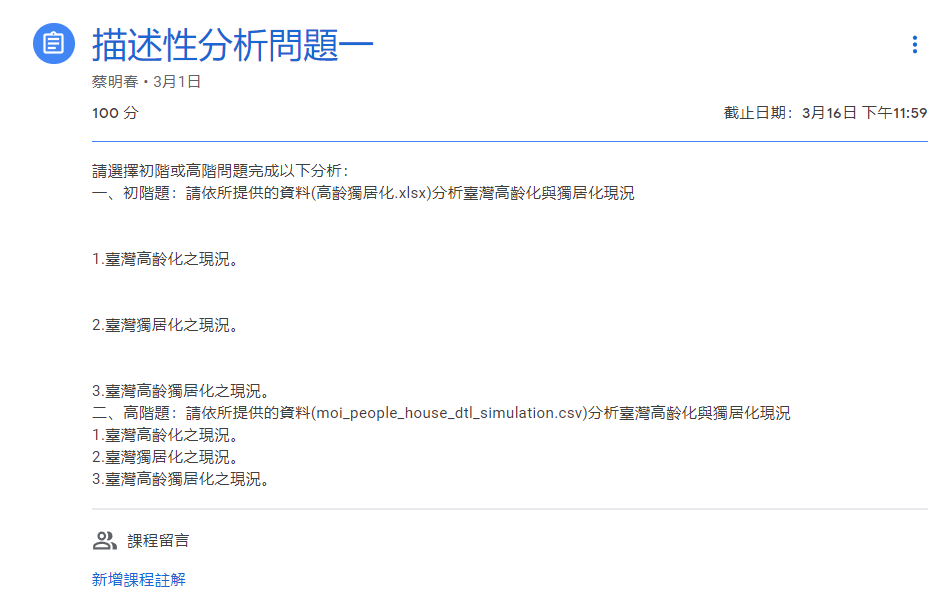

In [47]:
# !pip install geopandas

In [48]:
# !pip install geoplot

In [49]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.7/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 

# 自定義字體變數
myfont = FontProperties(fname=r'/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/fonts/ttf/taipei_sans_tc_beta.ttf')

# !!!!後續在相關函式中增加fontproperties=myfont屬性即可!!!!

--2022-03-11 04:08:26--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.2.110, 2607:f8b0:4004:806::200e
Connecting to drive.google.com (drive.google.com)|172.217.2.110|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jupjf74j1rq3fphqs7328q73k4p65o1o/1646971650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-03-11 04:08:27--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/jupjf74j1rq3fphqs7328q73k4p65o1o/1646971650000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 172.217.164.129, 2607:f8b0:4004:814::2001
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|172.217.164.129|:443... 

In [52]:
import geopandas as gpd
# import shapely
import pandas as pd
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from matplotlib import patches as mpatches

In [53]:
df = pd.read_csv('/content/drive/MyDrive/大學/高齡獨居化計畫.csv')

# df['older_precent'] = df['Total_older'] / df['total_city_people'] *100 
# df['lonely_precent'] = df['total_lonely'] / df['total_city_people'] *100 
# df['older_lonely_precent'] = df['total_old_and_lonely'] / df['total_city_people'] *100 


plt.rcParams['figure.figsize']=(10,10)

#匯入地圖套件
town_TA = gpd.read_file('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/台灣地圖/TOWN_MOI_1081121.shp', encoding='utf-8')


#匯入地區區碼
df_towm_id = pd.read_excel('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/鄉鎮市區.xlsx')
df_towm_id = df_towm_id.drop(['鄉鎮市區代碼'],axis = 1)

#區碼 跟 資料合併
df = df.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))


#資料 跟 經緯度合併
town_A_no = town_TA.merge(df, left_on=('TOWNNAME'), right_on=('TOWNNAME'))


#百分比資料
city_A_no = pd.DataFrame(town_A_no.groupby('COUNTYNAME').sum()['Total_older'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people'],columns=['older_precent'])
city_A_no['lonely_precent'] = town_A_no.groupby('COUNTYNAME').sum()['total_lonely'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people']
city_A_no['older_lonely_precent'] = town_A_no.groupby('COUNTYNAME').sum()['total_old_and_lonely'] / town_A_no.groupby('COUNTYNAME').sum()['total_city_people']

#百分比資料加入總資料
town_A_no = town_A_no.merge(city_A_no, left_on=('COUNTYNAME'), right_on=('COUNTYNAME'))
town_A_no.head()

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,addr_city_cd,Total_older,...,total_child_is_same_county,total_old_and_child_is_same_county,total_mate,total_old_and_mate,total_city_people,戶籍鄉鎮市區,縣市,older_precent,lonely_precent,older_lonely_precent
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213...",10014020,2790,...,5906,2169,5633,1585,13842,10014020.0,臺東縣,0.164779,0.139813,0.039632
1,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ...",10014110,464,...,1864,422,1830,297,4080,10014110.0,臺東縣,0.164779,0.139813,0.039632
2,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ...",10014160,386,...,2023,333,2000,177,5153,10014160.0,臺東縣,0.164779,0.139813,0.039632
3,V09,10014050,臺東縣,鹿野鄉,Luye Township,V,10014,"POLYGON ((121.19419 22.93667, 121.19392 22.936...",10014050,1614,...,3431,1243,3212,863,7736,10014050.0,臺東縣,0.164779,0.139813,0.039632
4,V10,10014060,臺東縣,池上鄉,Chishang Township,V,10014,"POLYGON ((121.21208 23.14418, 121.21230 23.144...",10014060,1754,...,3579,1371,3288,932,8153,10014060.0,臺東縣,0.164779,0.139813,0.039632


# 第一題



## 1.高齡


Text(0.5, 1.0, '臺灣高齡化之現況')

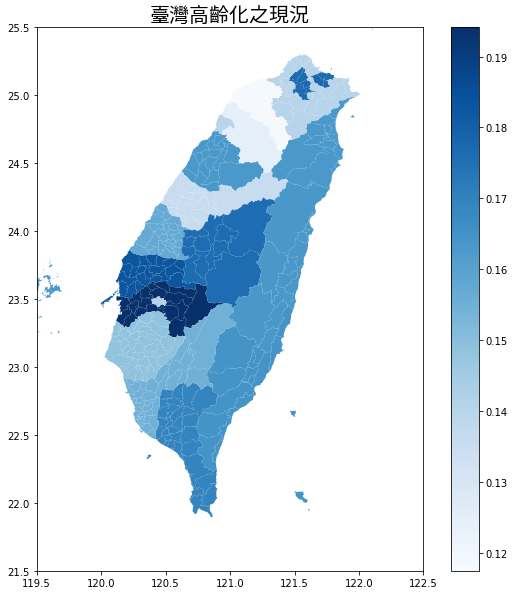

In [54]:
SA=town_A_no.plot(column='older_precent',cmap='Blues', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡化之現況')

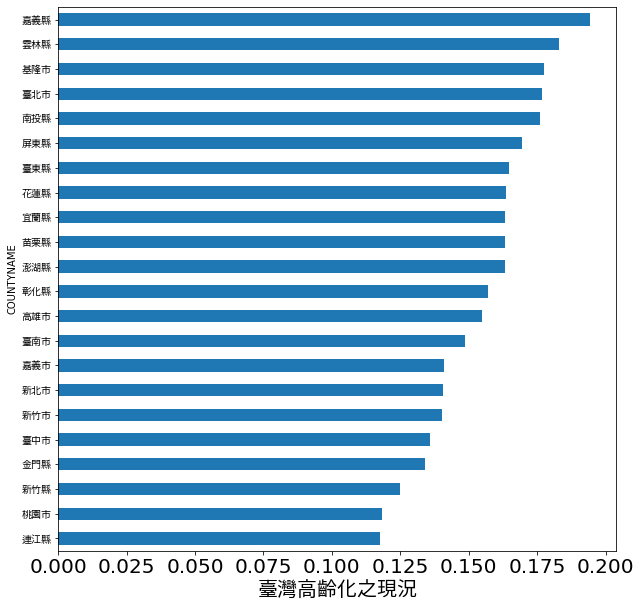

In [55]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('older_precent')['older_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡化之現況',fontproperties=myfont,fontsize=20)

## 2.獨居


Text(0.5, 1.0, '臺灣獨居化之現況')

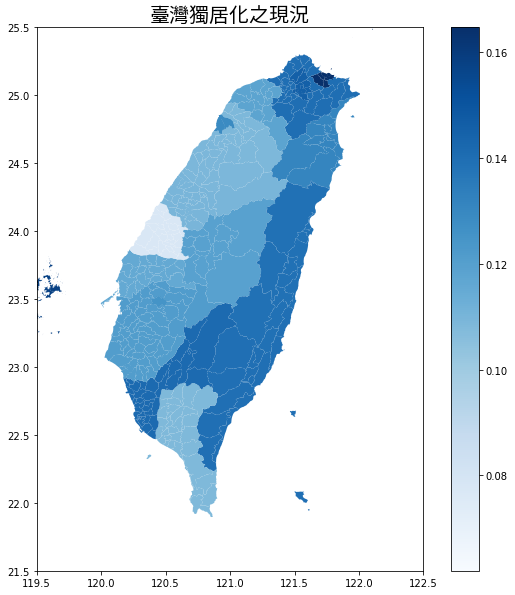

In [56]:
SA=town_A_no.plot(column='lonely_precent',cmap='Blues', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣獨居化之現況",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣獨居化之現況')

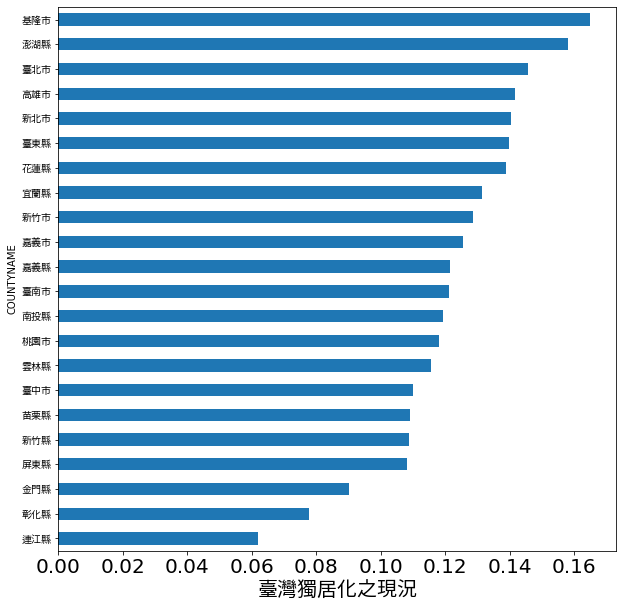

In [57]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('lonely_precent')['lonely_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣獨居化之現況',fontproperties=myfont,fontsize=20)

## 3.高齡且獨居

Text(0.5, 1.0, '臺灣高齡獨居化之現況。')

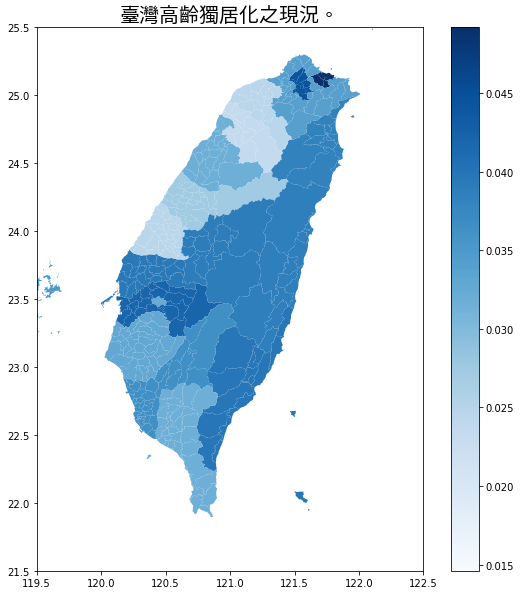

In [58]:
SA=town_A_no.plot(column='older_lonely_precent',cmap='Blues', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡獨居化之現況。",fontproperties=myfont,fontsize=20)

Text(0.5, 0, '臺灣高齡獨居化之現況。')

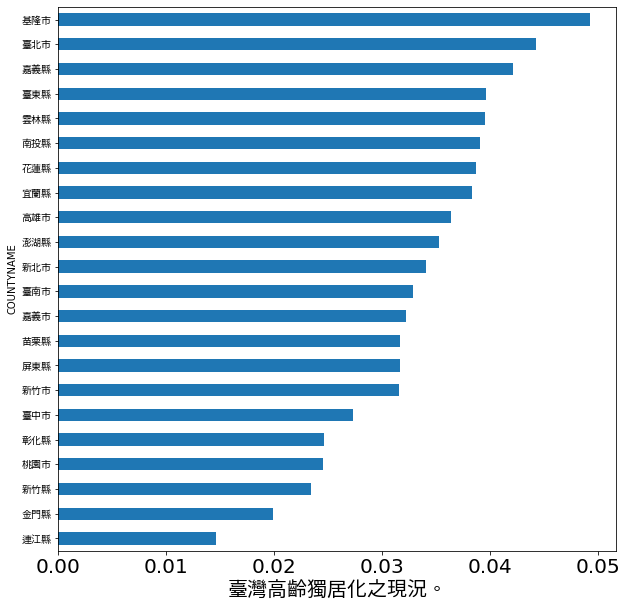

In [59]:
axes = town_A_no.groupby('COUNTYNAME').mean().sort_values('older_lonely_precent')['older_lonely_precent'].plot.barh(fontsize=25)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡獨居化之現況。',fontproperties=myfont,fontsize=20)

# 第二題

In [65]:
data = pd.read_csv('/content/drive/MyDrive/大學/闖關/闖關109_2/大數據資料/moi_people_house_dtl_simulation.csv')
data.dropna(axis=0, how='any', inplace=True)
data.head()

,person_sn,household_sn,coun_cd,addr_city_cd,gender_cd,birthday_date,birth_place_cd,education_cd,marriage_cd,living_type_cd,...,is_living_same_county,having_house_type_cd,floor_group_cd,purpose_group_cd,materials_group_cd,b_area,b_age,is_in_active_fault,is_in_lique_faction,is_in_dip_slope
0,1.0,1.0,10005,10005010,1,1945-09-10,10005,2,2,0,...,1,A,99,A,A,11.540861,37.0,0,0,0
3,4.0,4.0,10005,10005010,2,1951-09-26,10005,2,2,0,...,1,A,2,A,A,110.328155,24.0,2,4,2
6,7.0,7.0,10005,10005010,2,1975-03-13,10005,3,2,0,...,1,A,2,A,A,10.435569,8.0,0,0,0
14,15.0,15.0,10005,10005010,2,1955-01-26,10005,1,2,0,...,1,A,1,F,A,193.933016,12.0,0,0,0
16,16.0,16.0,10005,10005010,2,1938-01-04,10005,1,4,0,...,1,A,1,A,B,190.568848,29.0,0,0,0


## 1.高齡

In [66]:
import time
import datetime
times = datetime.datetime.now()

In [71]:
#把年齡人口弄出來
data['old'] = data['birthday_date'].apply(lambda x: 1 if times.year - int(x[:4]) > 65 else 0 )
data['TotalPeople'] = 1

#區碼 跟 資料合併
data = data.merge(df_towm_id, left_on=('addr_city_cd'), right_on=('戶籍鄉鎮市區'))

#資料百分比
city_people_percent = pd.DataFrame(data.groupby('縣市').sum()['old'] / data.groupby('縣市').sum()['TotalPeople'] , columns=['older_precent'])


#百分比資料 加入 總資料
town_A_no_2 = town_TA.merge(city_people_percent, left_on=('COUNTYNAME'), right_on=('縣市'))
town_A_no_2

,TOWNID,TOWNCODE,COUNTYNAME,TOWNNAME,TOWNENG,COUNTYID,COUNTYCODE,geometry,older_precent
0,V02,10014020,臺東縣,成功鎮,Chenggong Township,V,10014,"POLYGON ((121.40982 23.21369, 121.40984 23.213...",0.372102
1,V11,10014110,臺東縣,綠島鄉,Ludao Township,V,10014,"MULTIPOLYGON (((121.49155 22.67746, 121.49185 ...",0.372102
2,V16,10014160,臺東縣,蘭嶼鄉,Lanyu Township,V,10014,"MULTIPOLYGON (((121.61180 21.94290, 121.61133 ...",0.372102
3,V09,10014050,臺東縣,鹿野鄉,Luye Township,V,10014,"POLYGON ((121.19419 22.93667, 121.19392 22.936...",0.372102
4,V10,10014060,臺東縣,池上鄉,Chishang Township,V,10014,"POLYGON ((121.21208 23.14418, 121.21230 23.144...",0.372102
...,...,...,...,...,...,...,...,...,...
363,I01,10020010,嘉義市,東區,East District,I,10020,"POLYGON ((120.45882 23.45403, 120.45875 23.453...",0.289623
364,I02,10020020,嘉義市,西區,West District,I,10020,"POLYGON ((120.45173 23.46257, 120.45175 23.462...",0.289623
365,O02,10018020,新竹市,北區,North District,O,10018,"POLYGON ((120.93011 24.85302, 120.93023 24.852...",0.208979
366,O03,10018030,新竹市,香山區,Xiangshan District,O,10018,"POLYGON ((120.90359 24.82535, 120.90408 24.826...",0.208979


Text(0.5, 1.0, '臺灣高齡化之現況')

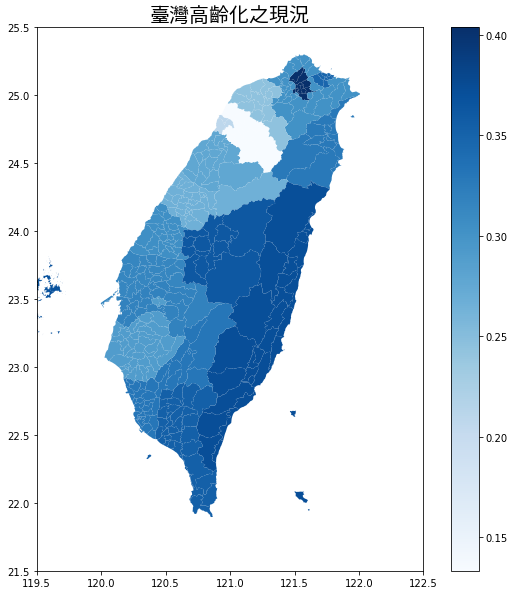

In [72]:
SA=town_A_no_2.plot(column='older_precent',cmap='Blues', legend=True)
SA.set_xlim(119.5, 122.5)
SA.set_ylim(21.5, 25.5)
plt.title("臺灣高齡化之現況 %",fontproperties=myfont,fontsize=25)

Text(0.5, 0, '臺灣高齡化之現況 %')

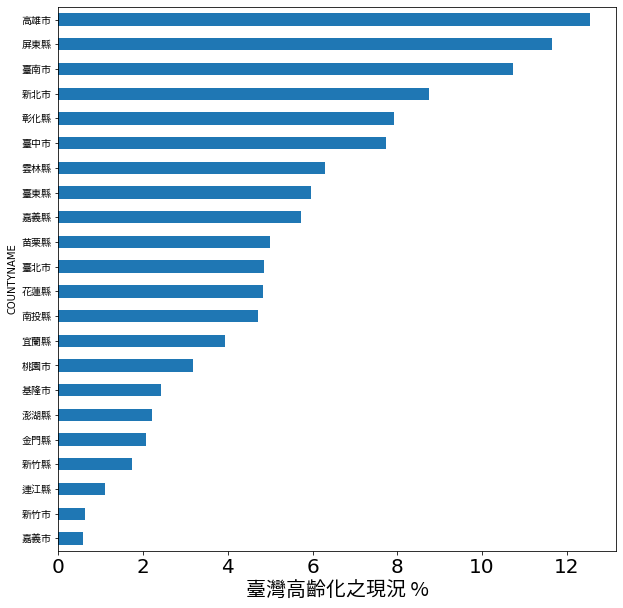

In [78]:
axes = town_A_no_2.groupby('COUNTYNAME').sum().sort_values('older_precent')['older_precent'].plot.barh(fontsize=20)
for label in axes.get_yticklabels():
    label.set_fontproperties(myfont)
plt.xlabel('臺灣高齡化之現況 %',fontproperties=myfont,fontsize=20)

## 2.獨居